In [ ]:
from skimage.io import imread, imshow
from skimage import transform
import matplotlib.pyplot as plt
import numpy as np

# **calib 1**


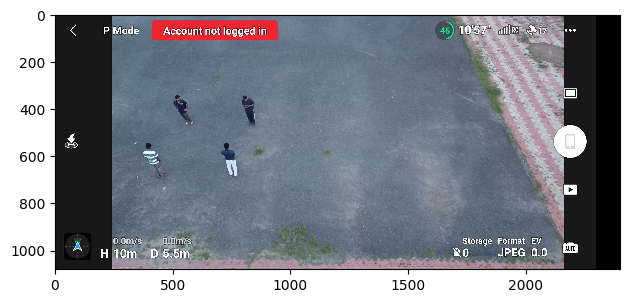

In [ ]:
img = imread('4_45.jpg')
imshow(img)

Homography Matrix:
[[ 2.18512314e+00  1.80246289e+00 -1.07069455e+02]
 [ 1.28878234e-01  3.49924969e+00 -7.94812538e+02]
 [ 1.61445864e-04  6.14239122e-04  1.00000000e+00]]


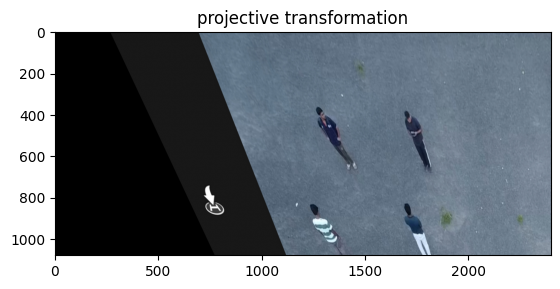

In [ ]:
import cv2
import numpy as np


src = np.array([518,359,
                803, 358,
                724, 555,
                394, 555,]).reshape((4, 2))
#destination coordinates
dst = np.array([1282, 405,
                1699, 416,
                1698, 851,
                1249, 853,]).reshape((4, 2))
#using skimage’s transform module where ‘projective’ is our desired parameter
'''H, _ = cv2.findHomography(src, dst)'''
tform = transform.estimate_transform('projective', src, dst)
tf_img = transform.warp(img, tform.inverse)
#plotting the transformed image
fig, ax = plt.subplots()
ax.imshow(tf_img)
_ = ax.set_title('projective transformation')



# Compute the homography matrix
H, _ = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)

# Print the homography matrix
print("Homography Matrix:")
print(H)



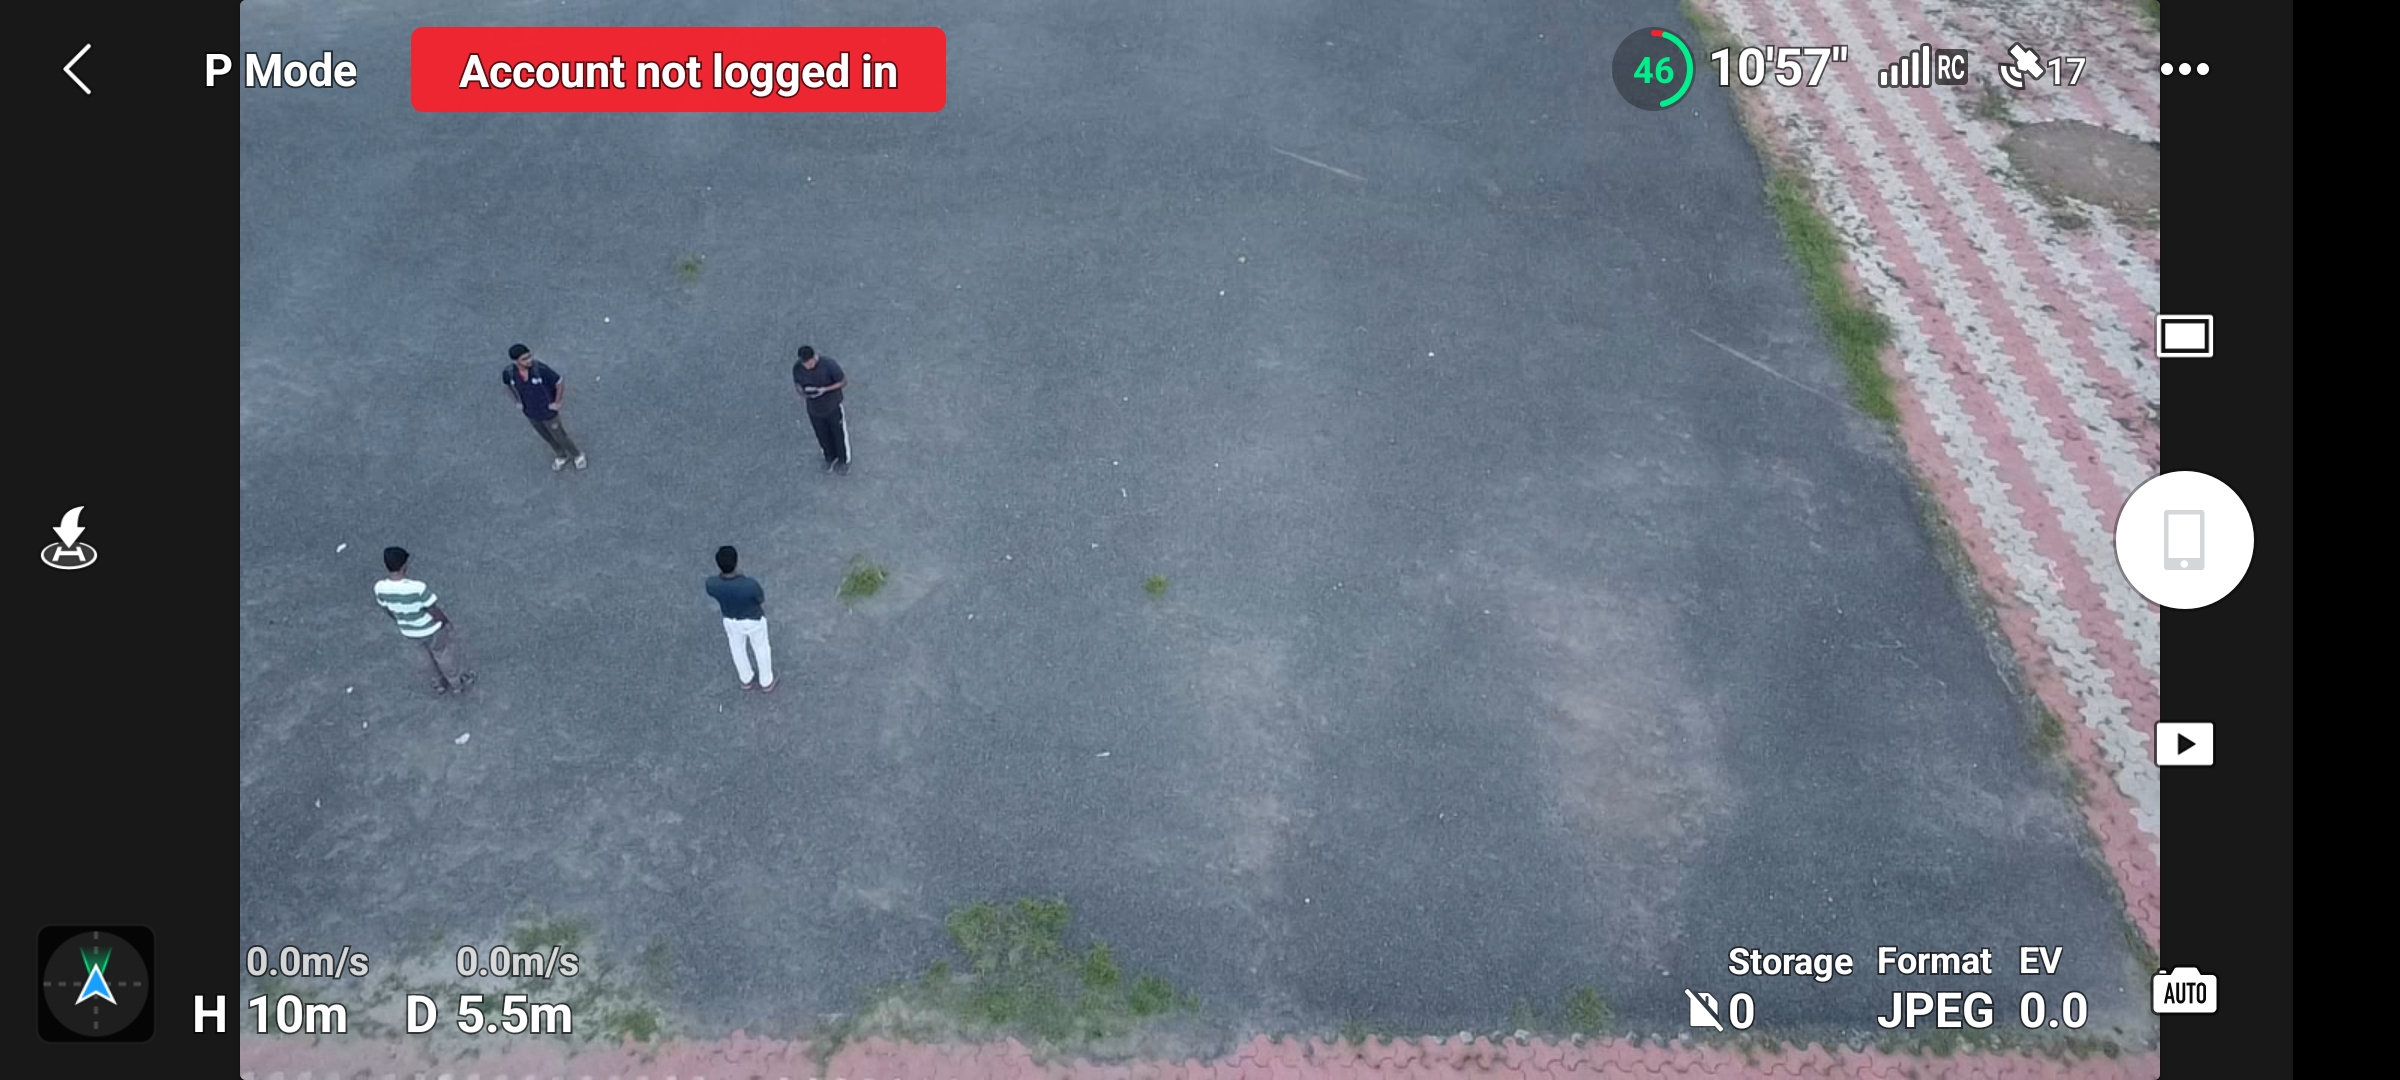

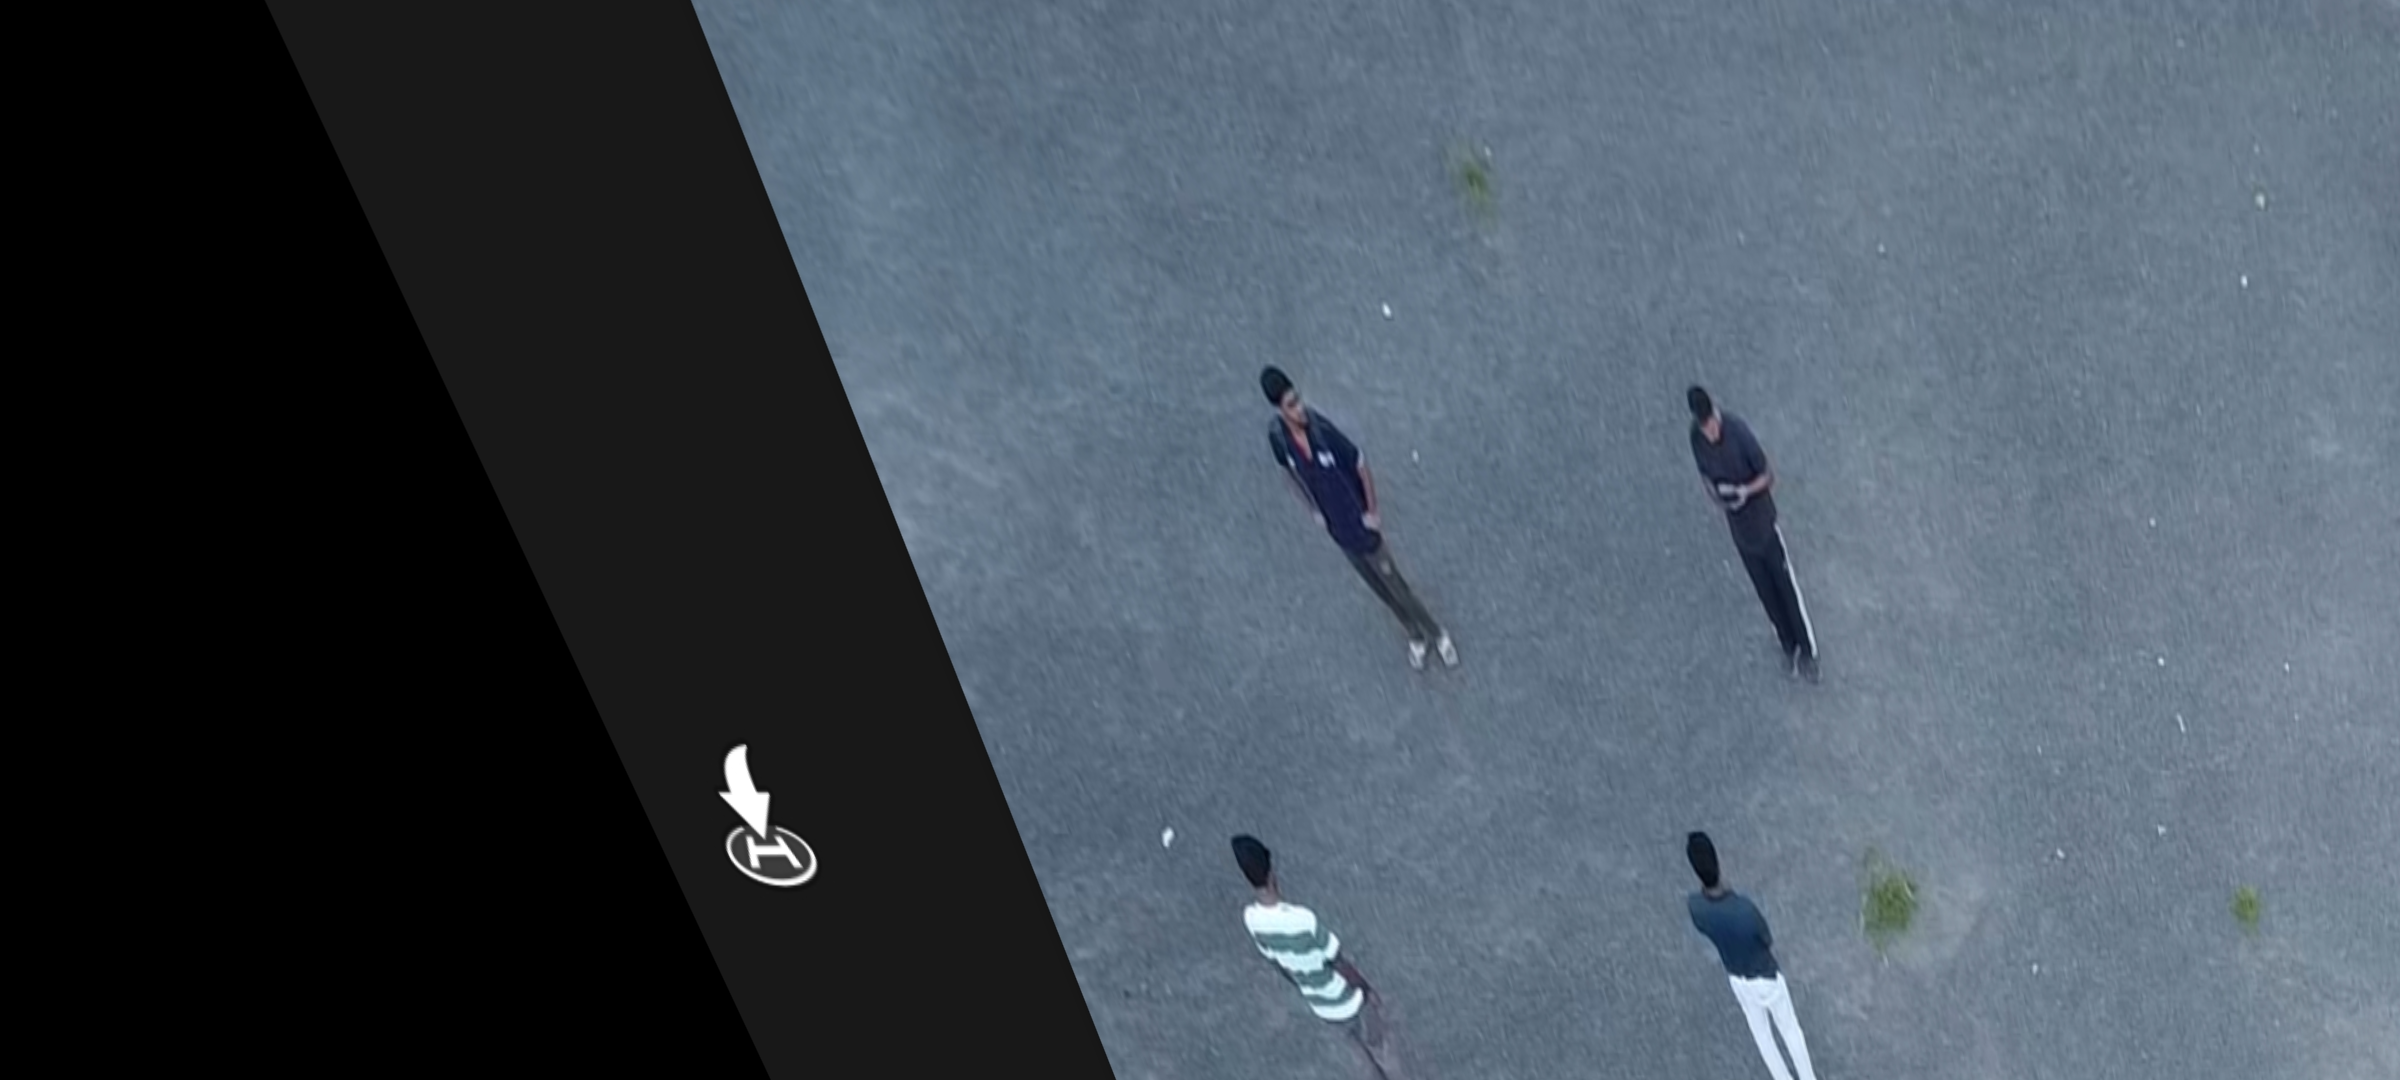

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


# Load the input image
input_image = cv2.imread("4_45.jpg")

# Define the homography matrix (replace with your own matrix)


# Apply the projective transformation
output_image = cv2.warpPerspective(input_image, H, (input_image.shape[1], input_image.shape[0]))

# Display the input and output images
cv2_imshow(input_image)
cv2_imshow(output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


actual image


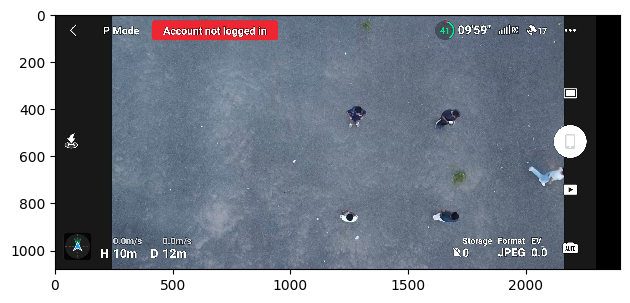

In [ ]:
print('actual image')
img_90 = imread('4_90.jpg')
imshow(img_90)

In [ ]:
print(H)

[[ 2.18512314e+00  1.80246289e+00 -1.07069455e+02]
 [ 1.28878234e-01  3.49924969e+00 -7.94812538e+02]
 [ 1.61445864e-04  6.14239122e-04  1.00000000e+00]]


In [ ]:
pixel_coordinates = np.array([
    [518, 359, 1],
    [803, 358, 1],
    [724, 555, 1],
    [394, 555, 1]
])
world_coordinates = np.dot(H, pixel_coordinates.T).T
lambda_scale = 0.0068
print('world_coordinates')
for row in world_coordinates:
    formatted_row = [f"{element:.2f}" for element in row]
    print(" ".join(formatted_row))
normalized_coordinates = [[x / z, y / z, 1] for x, y, z in world_coordinates]

# Print the normalized coordinates
print('NORMALIZED COORDINATES')
for coord in normalized_coordinates:
    print(coord)
# Normalize by lambda to get real-world coordinates
real_world_coordinates = [[x * lambda_scale, y * lambda_scale, 1] for x, y, _ in normalized_coordinates]

# Print the results
print("Image Pixel Coordinates:")
print(pixel_coordinates)
print("\nReal-World Coordinates (in meters):")
for coord in real_world_coordinates:
    print(coord)


world_coordinates
1671.91 528.18 1.30
2292.87 561.41 1.35
2475.33 1240.58 1.46
1754.24 1198.05 1.40
NORMALIZED COORDINATES
[1281.9999999999995, 405.00000000000006, 1]
[1698.9999999999995, 415.9999999999999, 1]
[1697.9999999999998, 850.9999999999999, 1]
[1248.9999999999995, 852.9999999999999, 1]
Image Pixel Coordinates:
[[518 359   1]
 [803 358   1]
 [724 555   1]
 [394 555   1]]

Real-World Coordinates (in meters):
[8.717599999999996, 2.7540000000000004, 1]
[11.553199999999997, 2.828799999999999, 1]
[11.546399999999998, 5.786799999999999, 1]
[8.493199999999996, 5.800399999999999, 1]


# **TEST IMAGE**

In [ ]:
pixel_coordinates=np.array([[1442,611,1],[1171,484,1],[1449,485,1],[1468,717,1],[1127,716,1]])
world_coordinates = np.dot(H, pixel_coordinates.T).T
lambda_scale = 0.0068
print('world_coordinates')
for row in world_coordinates:
    formatted_row = [f"{element:.2f}" for element in row]
    print(" ".join(formatted_row))
normalized_coordinates = [[x / z, y / z, 1] for x, y, z in world_coordinates]

# Print the normalized coordinates
print('NORMALIZED COORDINATES')
for coord in normalized_coordinates:
    print(coord)
# Normalize by lambda to get real-world coordinates
real_world_coordinates = [[x * lambda_scale, y * lambda_scale, 1] for x, y, _ in normalized_coordinates]

# Print the results
print("Image Pixel Coordinates:")
print(pixel_coordinates)
print("\nReal-World Coordinates (in meters):")
for coord in real_world_coordinates:
    print(coord)




world_coordinates
4145.18 1529.07 1.61
3324.10 1049.74 1.49
3933.37 1089.07 1.53
4393.06 1903.34 1.68
3646.13 1855.90 1.62
NORMALIZED COORDINATES
[2577.681703233615, 950.8529586709107, 1]
[2236.4270294046155, 706.2565114344395, 1]
[2567.739337548642, 710.9537474020639, 1]
[2618.9494654485707, 1134.6900819193002, 1]
[2248.274806847427, 1144.382348270452, 1]
Image Pixel Coordinates:
[[1442  611    1]
 [1171  484    1]
 [1449  485    1]
 [1468  717    1]
 [1127  716    1]]

Real-World Coordinates (in meters):
[17.52823558198858, 6.465800118962192, 1]
[15.207703799951384, 4.802544277754189, 1]
[17.460627495330765, 4.834485482334034, 1]
[17.80885636505028, 7.715892557051241, 1]
[15.288268686562503, 7.781799968239073, 1]


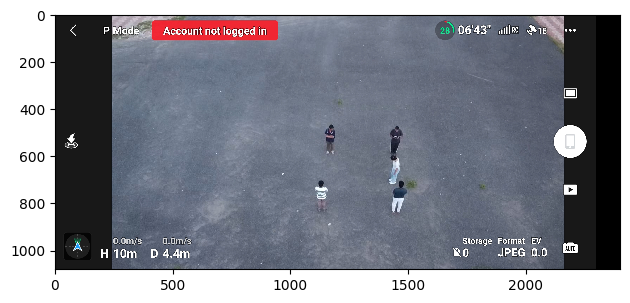

In [ ]:
from skimage.io import imread, imshow
img_test=imread('test_1.5.jpg')
imshow(img_test)

# calib **2**

In [ ]:
import cv2
import numpy as np


src = np.array([1838,684,
                2256, 696,
                1832, 913,
                2312, 933,]).reshape((4, 2))
#destination coordinates
dst = np.array([1698, 813,
                2368, 1047,
                1498, 1415,
                2184, 1691,]).reshape((4, 2))
#using skimage’s transform module where ‘projective’ is our desired parameter

H_10, _ = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)

# Print the homography matrix
print("Homography Matrix:")
print(H_10)

Homography Matrix:
[[ 1.73790580e+00 -1.93961313e-01 -1.03229361e+03]
 [ 4.75638855e-01  3.91392056e+00 -2.57971622e+03]
 [-9.27421241e-05  5.34468506e-04  1.00000000e+00]]


In [ ]:
import cv2
import numpy as np


src = np.array([1910,1223,
                2251, 1245,
                1913, 1468,
                2270, 1474,]).reshape((4, 2))
#destination coordinates
dst = np.array([1743,952,
                2206, 1100,
                1604, 1354,
                2069, 1530,
                ]).reshape((4, 2))
#using skimage’s transform module where ‘projective’ is our desired parameter

H_14, _ = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)

# Print the homography matrix
print("Homography Matrix:")
print(H_14)

Homography Matrix:
[[ 3.99014213e-01 -2.50972643e-01  6.82247498e+02]
 [-4.35730392e-02  1.17607297e+00 -7.33868500e+02]
 [-2.33289612e-04  8.02539909e-05  1.00000000e+00]]


In [ ]:
pixel_coordinates = np.array([
   [1693,818,1],
                [1489, 1421,1]

])
world_coordinates = np.dot(H_10, pixel_coordinates.T).T
lambda_scale = 0.0029
print('world_coordinates')
for row in world_coordinates:
    formatted_row = [f"{element:.2f}" for element in row]
    print(" ".join(formatted_row))
normalized_coordinates = [[x / z, y / z, 1] for x, y, z in world_coordinates]

# Print the normalized coordinates
print('NORMALIZED COORDINATES')
for coord in normalized_coordinates:
    print(coord)
# Normalize by lambda to get real-world coordinates
real_world_coordinates = [[x * lambda_scale, y * lambda_scale, 1] for x, y, _ in normalized_coordinates]

# Print the results
print("Image Pixel Coordinates:")
print(pixel_coordinates)
print("\nReal-World Coordinates (in meters):")
for coord in real_world_coordinates:
    print(coord)

world_coordinates
1751.32 1427.13 1.28
1279.83 3690.19 1.62
NORMALIZED COORDINATES
[1368.0237842524791, 1114.7840435284083, 1]
[789.3422802773719, 2275.9475588475425, 1]
Image Pixel Coordinates:
[[1693  818    1]
 [1489 1421    1]]

Real-World Coordinates (in meters):
[3.967268974332189, 3.232873726232384, 1]
[2.289092612804378, 6.600247920657873, 1]


In [ ]:
pixel_coordinates = np.array([
   [3515,496,1],
                [3662, 556,1],

])
world_coordinates = np.dot(H_14, pixel_coordinates.T).T
lambda_scale = 0.0044
print('world_coordinates')
for row in world_coordinates:
    formatted_row = [f"{element:.2f}" for element in row]
    print(" ".join(formatted_row))
normalized_coordinates = [[x / z, y / z, 1] for x, y, z in world_coordinates]

# Print the normalized coordinates
print('NORMALIZED COORDINATES')
for coord in normalized_coordinates:
    print(coord)
# Normalize by lambda to get real-world coordinates
real_world_coordinates = [[x * lambda_scale, y * lambda_scale, 1] for x, y, _ in normalized_coordinates]

# Print the results
print("Image Pixel Coordinates:")
print(pixel_coordinates)
print("\nReal-World Coordinates (in meters):")
for coord in real_world_coordinates:
    print(coord)

world_coordinates
1960.30 -303.70 0.22
2003.90 -239.54 0.19
NORMALIZED COORDINATES
[8918.846777803587, -1381.7344097458656, 1]
[10529.387299031061, -1258.633469843492, 1]
Image Pixel Coordinates:
[[3515  496    1]
 [3662  556    1]]

Real-World Coordinates (in meters):
[39.242925822335785, -6.079631402881809, 1]
[46.32930411573667, -5.537987267311365, 1]


# **calib3**

In [ ]:
import cv2
import numpy as np


src = np.array([1372,737,
                1880, 729,
                1877, 1069,
                1302, 1069,]).reshape((4, 2))
#destination coordinates
dst = np.array([1492,788,
                2295, 788,
                2307, 1591,
                1490, 1595,
                ]).reshape((4, 2))
#using skimage’s transform module where ‘projective’ is our desired parameter

H_3_10, _ = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)

# Print the homography matrix
print("Homography Matrix:")
print(H_3_10)

Homography Matrix:
[[ 2.63838501e+00  1.31940946e+00 -2.31132884e+03]
 [ 1.41040253e-01  4.57253773e+00 -2.35878868e+03]
 [ 9.60857297e-05  5.38603322e-04  1.00000000e+00]]


In [ ]:
import cv2
import numpy as np


src = np.array([1470,1195,
                1913, 1181,
                1899, 1527,
                1417, 1527,]).reshape((4, 2))
#destination coordinates
dst = np.array([1609,863,
                2198, 868,
                2198, 1454,
                1600, 1463
                ,]).reshape((4, 2))
#using skimage’s transform module where ‘projective’ is our desired parameter

H_3_14, _ = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)

# Print the homography matrix
print("Homography Matrix:")
print(H_3_14)

Homography Matrix:
[[ 3.54609972e+00  1.25184637e+00 -3.31224183e+03]
 [ 4.44497355e-01  4.56524555e+00 -4.28714974e+03]
 [ 3.34794806e-04  5.17806197e-04  1.00000000e+00]]


# **test**

In [ ]:
import math
pixel_coordinates = np.array([
   [1788,1697,1],
                [2320, 1664,1],
   [1880,2076,1],
   [2450,2005,1]

])
world_coordinates = np.dot(H_3_10, pixel_coordinates.T).T
lambda_scale = 0.00374
print('world_coordinates')
for row in world_coordinates:
    formatted_row = [f"{element:.2f}" for element in row]
    print(" ".join(formatted_row))
normalized_coordinates = [[x / z, y / z, 1] for x, y, z in world_coordinates]

# Print the normalized coordinates
print('NORMALIZED COORDINATES')
for coord in normalized_coordinates:
    print(coord)
# Normalize by lambda to get real-world coordinates
real_world_coordinates = [[x * lambda_scale, y * lambda_scale, 1] for x, y, _ in normalized_coordinates]

# Print the results
print("Image Pixel Coordinates:")
print(pixel_coordinates)
print("\nReal-World Coordinates (in meters):")
for coord in real_world_coordinates:
    print(coord)
for i in range(len(real_world_coordinates)):
    for j in range(i+1, len(real_world_coordinates)):  # Start from the next coordinate to avoid duplicates
        x1, y1,z1 = real_world_coordinates[i]
        x2, y2,z2 = real_world_coordinates[j]

        # Calculate the distance using the Euclidean distance formula
        distance = math.sqrt((x1 - x2)**2 + (y1 - y2)**2)
        print(i,j ,distance)


world_coordinates
4645.14 5652.99 2.09
6005.22 5577.13 2.12
5387.93 7398.96 2.30
6798.13 7154.70 2.32
NORMALIZED COORDINATES
[2227.0191938625735, 2710.2107946087117, 1]
[2833.7814948479813, 2631.7697195350124, 1]
[2343.8193730481953, 3218.642041440314, 1]
[2936.16460732533, 3090.1689273052875, 1]
Image Pixel Coordinates:
[[1788 1697    1]
 [2320 1664    1]
 [1880 2076    1]
 [2450 2005    1]]

Real-World Coordinates (in meters):
[8.329051785046024, 10.136188371836582, 1]
[10.598342790731449, 9.842818751060946, 1]
[8.76588445520025, 12.037721234986774, 1]
[10.981255631396733, 11.557231788121776, 1]
0 1 2.2881755620753417
0 2 1.9510638152951945
0 3 3.008911702520529
1 2 2.8592832083236424
1 3 1.7566542930213942
2 3 2.266878813891651
